
# <center> Skill Factory Year One Final Project
## <center> Property Price Prediction

<center> 
<img src=https://camo.githubusercontent.com/a0c51106eed290b2a45da78f0de70ebb1105b0fc21613309d13f6e651cb9660c/68747470733a2f2f7777772e76616e636f757665727265616c657374617465706f64636173742e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f31302f44657461636865642d686f6d652d7072696365732e6a7067 align="center" width="400"/> </center>


## 1) Project Overview

Develop a service for predicting the cost of properties based on the history of offers.

## 2) Explonatory Data Analysis - Part 1

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce

from scipy import stats
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


**Data Overview**

In [3]:
# Set up different file path options
W_pth = r'C:\Users\mikha\OneDrive\Documents\Coding\Data\Final project\data.csv\data.csv' # Windows path
L_pth = '/home/mike/Documents/Coding/Data/Final project/data.csv/data.csv' # Linux path

if os.path.exists(L_pth):
    data = pd.read_csv(L_pth)

elif os.path.exists(W_pth):
    data = pd.read_csv(W_pth)

else:
    print('Check if the dataset path is correct')

In [4]:
data.head(3)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"


Each property has the following features:
1. status
2. private pool
3. propertyType
4. street
5. baths
6. homeFacts
7. fireplace
8. city
9. schools
10. sqft
11. zipcode
12. beds
13. state
14. stories
15. mls-id
16. PrivatePool
17. MlsId
18. target

In [5]:
data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


In [6]:
data.shape

(377185, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [8]:
# Check duplicates

print('Number of full duplicates: {}'.format(data.duplicated().sum()))

Number of full duplicates: 50


In [9]:
# Remove duplicates

data.drop_duplicates(inplace=True)
print('Number of lines without duplicates: {}'.format(data.shape))

Number of lines without duplicates: (377135, 18)


In [10]:
# Check missing values

null_data = data.isnull().sum()
display(null_data[null_data > 0])

status           39917
private pool    372954
propertyType     34733
street               2
baths           106308
fireplace       274023
city                34
sqft             40550
beds             91254
stories         150673
mls-id          352193
PrivatePool     336825
MlsId            66869
target            2480
dtype: int64

In [11]:
# We have 2480 missing values in 'target' (which is about 0.65% of the total database).
# There is no use for them - delete.

data.drop(data[data.target.isna()].index, inplace=True)
data.shape

(374655, 18)

## 3) Feature Engeneering

In [12]:
# mls-id and MlsId represent only listing ID's in the US real-estate listing system.
# They are not infornative - delete

data = data.drop(['mls-id', 'MlsId'], axis=1)
data.shape


(374655, 16)

**target**

In [13]:
data['target'] = data['target'].apply(lambda x: str(x).lower())
data['target'] = data['target'].astype(str)
data['target'].value_counts().head()

$225,000    1462
$275,000    1355
$250,000    1312
$350,000    1296
$299,900    1276
Name: target, dtype: int64

In [14]:
# Remove all unnecessary symbols
data['target'] = data['target'].replace(r'[^\d]', '', regex=True)

# Convert to numeric
data['target'] = pd.to_numeric(data['target'], errors='coerce')
data['target'].value_counts().head()

225000    1806
275000    1650
250000    1644
350000    1641
325000    1562
Name: target, dtype: int64

In [15]:
# remove straigt away all extremely small target values
data = data[data['target'] >= 1000]

In [16]:
# Shapiro-Wilk test for normality

stat, p = shapiro(data['target'])

if p > 0.05:
    print("The target column is likely normally distributed.")
else:
    print("The target column is not normally distributed.")


The target column is not normally distributed.


c:\Users\mikha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


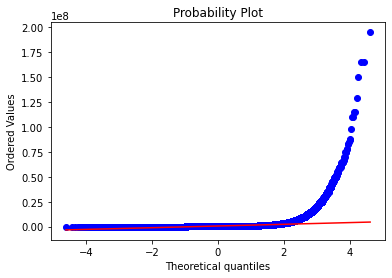

In [17]:
# Use a Q-Q plot ("quantile-quantile plot") to visually check if the values in data['target'] are normally distributed

# Extract the values from the 'target' column of the data DataFrame
values = data['target'].values

# Use the scipy.stats.probplot function to create a Q-Q plot
stats.probplot(values, dist="norm", plot=plt)

# Show the plot
plt.show()


The target values are not distributed normally. We will work with this later.

**status**

In [18]:
data['status'] = data['status'].apply(lambda x: str(x).lower())
data['status'] = data['status'].astype(str)
data['status'].describe()

count       374554
unique         150
top       for sale
freq        199511
Name: status, dtype: object

In [19]:
data['status'].value_counts(dropna=False)

for sale                     199511
active                       105187
nan                           39247
foreclosure                    5981
new construction               5458
                              ...  
contingent - sale of home         1
coming soon: dec 15.              1
contract                          1
coming soon: oct 24.              1
coming soon: dec 27.              1
Name: status, Length: 150, dtype: int64

In [20]:
# Unify the status
def status_optimisation(status):
    # Create lists of words to look for
    contingent_list = ['contingent', 'contingencies', 'contingency', 'pending',
                   'continue', 'contract', 'backups', 'p', 'c', 'pi', 'ct',
                   'due diligence period', 'p pending sale', 'closed', 'pf',
                   'accepted offer', 'ps', 'backup']
    active_list = ['active', 'for sale', 'lease/purchase', 'back on market',
                   'listing extended', 're activated', 'reactivated']
    new_list = ['new', 'coming soon']
    foreclosure_list = ['foreclosure', 'pre-foreclosure']
    
    # Check if the heating string contains any of the words in the lists
    if status:
        if 'rent' in status:
            return 'rent'
        elif any(word in status for word in foreclosure_list):
            return 'foreclosure'
        elif any(word in status for word in contingent_list):
            return 'contingent'
        elif any(word in status for word in active_list):
            return 'active'
        elif any(word in status for word in new_list):
            return 'new'
        else:
            return 'no data'
    else:
        return 'no data'
    
data['status'] = data['status'].apply(lambda x: status_optimisation(x))
data['status'].value_counts()

active         199539
contingent     125427
no data         39247
foreclosure      9264
new               690
rent              387
Name: status, dtype: int64

**private pool & PrivatePool**

In [21]:
data['private pool'] = data['private pool'].apply(lambda x: str(x).lower())
data['private pool'].describe()

count     374554
unique         2
top          nan
freq      370403
Name: private pool, dtype: object

In [22]:
data['PrivatePool'] = data['PrivatePool'].apply(lambda x: str(x).lower())
data['PrivatePool'].describe()

count     374554
unique         2
top          nan
freq      334435
Name: PrivatePool, dtype: object

In [23]:
# Merging the columns
data['private pool'] = data['private pool'].apply(lambda x: 1 if x == 'yes' else 0)
data['PrivatePool'] = data['PrivatePool'].apply(lambda x: 1 if x == 'yes' else 0)
data['PrivatePool'] = data['private pool'] | data['PrivatePool']
data['PrivatePool'] = data['PrivatePool'].astype('int')

**propertyType**

In [24]:
data['propertyType'] = data['propertyType'].apply(lambda x: str(x).lower())
data['propertyType'] = data['propertyType'].astype(str)
data['propertyType'].describe()

count                 374554
unique                  1272
top       single-family home
freq                   91355
Name: propertyType, dtype: object

In [25]:
data['propertyType'].value_counts(dropna=False)

single-family home                                   91355
single family                                        61884
condo                                                42364
nan                                                  34538
single family home                                   31724
                                                     ...  
cape cod, florida, ranch, traditional                    1
contemporary/modern, english, french, traditional        1
1 story, northwestern contemporary                       1
contemporary, modern, traditional                        1
other (see remarks), ranch                               1
Name: propertyType, Length: 1272, dtype: int64

In [26]:
# Unify the statuses
def propertyType_optimisation(prop_type):
    # Create lists of words to look for
    house_list = ['house', 'family', 'home', 'traditional', 'stories', 'story', 
                  'transitional', 'florida', 'bungalow', 'cape cod', 'mediterranean']
    townhouse_list = ['townhouse', 'multiplex', 'duplex', 'triplex', 'urban', 'fourplex',
                      'attached', 'detached','split-entry']
    condo_list = ['condo', 'apartment', 'cooperative', 'high rise', 'multiple', 'coop',
                  'co-op', 'loft', 'flat', 'penthouse']
    ranches_list = ['ranches', 'rancher', 'ranch', 'farm', 'miscellaneous']
    
    # Check if the heating string contains any of the words in the lists
    if prop_type:
        if any(word in prop_type for word in house_list):
            return 'house'
        elif any(word in prop_type for word in townhouse_list):
            return 'townhouse'
        elif any(word in prop_type for word in condo_list):
            return 'condo'
        elif any(word in prop_type for word in ranches_list):
            return 'ranches'
        elif 'other' in prop_type:
            return 'other'
        elif 'contemporary' in prop_type:
            return 'contemporary'
        elif 'land' in prop_type:
            return 'land'
        elif 'commercial' in prop_type:
            return 'other'
        elif 'mobile' in prop_type:
            return 'mobile'
        elif 'nan' in prop_type:
            return 'no data'
        else:
            return 'house'
    else:
        return 'no data'
    
data['propertyType'] = data['propertyType'].apply(lambda x: propertyType_optimisation(x))
data['propertyType'].value_counts()

house           248691
condo            49504
no data          34538
land             31404
contemporary      2760
mobile            2670
ranches           2422
townhouse         1911
other              654
Name: propertyType, dtype: int64

**street**

In [27]:
data['street'] = data['street'].apply(lambda x: str(x).lower())
data['street'].describe()

count                    374554
unique                   333851
top       address not disclosed
freq                        672
Name: street, dtype: object

In [28]:
data['street'].value_counts().head(10)

address not disclosed    672
undisclosed address      515
(undisclosed address)    391
address not available    175
unknown address           72
2103 e state hwy 21       57
11305 gulf fwy            54
17030 youngblood rd.      38
ne 58th cir               34
9470 lancaster rd. sw     32
Name: street, dtype: int64

In [29]:
# Unify the statuses
def street_optimisation(address):
    # Create lists of words to look for
    drive_list = ['drive', 'dr', 'edr', 'ndr', 'sdr', 'wdr']
    lane_list = ['lane', 'ln', 'eln', 'nln', 'sln', 'wln', 'laneway', 'lnwy']
    way_list = ['way', 'freeway', 'fwy', 'highway', 'hwy', 'driveway', 'dvwy', 
                'expressway', 'exp', 'fairway', 'fawy', 'footway', 'ftwy',
                'motorway', 'mtwy', 'parkway', 'pkwy', 'pwy', 'pathway', 'pway']
    
    if address:
        if 'address' in address: return 'no data'
        elif 'street' in address: return 'street'
        elif 'st' in address: return 'street'
        elif any(word in address for word in drive_list):
            return 'drive'
        elif any(word in address for word in lane_list):
            return 'lane'
        elif any(word in address for word in way_list):
            return 'way'
        elif 'avenue' in address: return 'avenue'
        elif 'ave' in address: return 'avenue'
        elif 'rd' in address: return 'road'
        elif 'road' in address: return 'road'
        elif 'blvd' in address: return 'blvd'
        elif 'circle' in address: return 'circle'
        elif 'cir' in address: return 'circle'
        elif 'ct' in address: return 'court'
        elif 'court' in address: return 'court'
        elif 'pl' in address: return 'place'
        elif 'place' in address: return 'place'
        else:
            return 'other'
    else:
        return 'no data'

data['street'] = data['street'].apply(lambda x: street_optimisation(x))
data['street'].value_counts().head(50)

street     109836
drive       59737
avenue      58525
road        33303
other       27129
lane        21636
court       15401
place       14757
way         13208
blvd        11827
circle       7362
no data      1833
Name: street, dtype: int64

**baths**

In [30]:
data['baths'] = data['baths'].apply(lambda x: str(x).lower())
data['baths'].describe()

count     374554
unique       225
top          nan
freq      105275
Name: baths, dtype: object

In [31]:
data['baths'].value_counts().head(10)

nan             105275
2 baths          52063
3 baths          35392
2                20428
2.0              16354
4 baths          14723
3.0              10795
3                10093
bathrooms: 2      9410
2.5               8113
Name: baths, dtype: int64

In [32]:
# Remove comas for the large numbers (i.e. 1,000 or 1,750)
# We will delete them later - they are not bathrooms
data['baths'] = data['baths'].str.replace(',', '', regex=True)
# Round up such numbers as '2.5 bathrooms'
data['baths'] = data['baths'].str.replace('\.\d+', '', regex=True)
# Leave only numbers
data['baths'] = data['baths'].str.replace('\D+', '', regex=True)

In [33]:
data['baths']=pd.to_numeric(data['baths'], errors='coerce')
# A lot of data is missing. We are taking the risk to fill it with '2'
data['baths'] = data['baths'].fillna('2')
data['baths'] = data['baths'].astype('int')

In [34]:
# Replacing all 50+ bathrooms with 2
data['baths'] = data['baths'].apply(lambda x: 2 if x > 50 else x)
# Replacing all 9+ bathrooms with 9
data['baths'] = data['baths'].apply(lambda x: 9 if x > 9 else x)
data['baths'] = data['baths'].astype('int16')
data['baths'].value_counts().head(10)

2    235261
3     70257
4     27515
1     18491
5      9733
6      4486
0      3918
7      2140
9      1564
8      1189
Name: baths, dtype: int64

**homeFacts**

In [35]:
data['homeFacts'] = data['homeFacts'].apply(lambda x: str(x).lower())
data['homeFacts'].describe()

count                                                374554
unique                                               318345
top       {'ataglancefacts': [{'factvalue': '', 'factlab...
freq                                                   7134
Name: homeFacts, dtype: object

In [36]:
# The structure of this cell is a bit complex
data['homeFacts'][0]

"{'ataglancefacts': [{'factvalue': '2019', 'factlabel': 'year built'}, {'factvalue': '', 'factlabel': 'remodeled year'}, {'factvalue': 'central a/c, heat pump', 'factlabel': 'heating'}, {'factvalue': '', 'factlabel': 'cooling'}, {'factvalue': '', 'factlabel': 'parking'}, {'factvalue': none, 'factlabel': 'lotsize'}, {'factvalue': '$144', 'factlabel': 'price/sqft'}]}"

In [37]:
# We will deal with 'lot_size' in the future. Some of the are written in acres.
# Create a new column 'lotsize_measure' to mark those cells that are using acres.

import re

def get_lotsize_measure(home_facts_str):
    if re.search(r"acre['s]*", home_facts_str):
        return 'acre'
    return None

data['lotsize_measure'] = data['homeFacts'].apply(get_lotsize_measure)
data['lotsize_measure'].value_counts()

acre    76827
Name: lotsize_measure, dtype: int64

In [38]:
# Remove all non-numeric symbols used in 'factvalues'

import re

def process_home_facts(home_facts):
    # Make the string lowercase
    home_facts = home_facts.lower()
    # Remove commas between digits
    home_facts = re.sub(r'(\d),(\d)', r'\1\2', home_facts)
    # Remove the '$' symbol
    home_facts = home_facts.replace('$', '')
    # Remove the ' sqft', ' sq. ft.', and ' acres' strings
    home_facts = home_facts.replace(' sqft', '')
    home_facts = home_facts.replace('/sqft', '')
    home_facts = home_facts.replace(' sq. ft.', '')
    # Remove the ' lot', ' acre', and 'contact manager' strings
    home_facts = home_facts.replace(' lot', '')
    home_facts = home_facts.replace(' acres', '')
    home_facts = home_facts.replace(' acre', '')
    home_facts = home_facts.replace('contact manager', '')
    # Remove the ' /', '—', '-' and 'no info' strings
    home_facts = home_facts.replace('—', '')
    home_facts = home_facts.replace('-', '')
    home_facts = home_facts.replace(' /', '')
    home_facts = home_facts.replace('no info', '')
    return home_facts

# Iterate over each row in the 'homeFacts' column
for i, row in data.iterrows():
    home_facts = row['homeFacts']
    home_facts = process_home_facts(home_facts)
    data.at[i, 'homeFacts'] = home_facts

In [39]:
# Create a regex pattern to match a key-value pair in the string
pattern = r"{'factvalue': '(.*?)', 'factlabel': '(.*?)'}"

# Iterate over each row in the 'homeFacts' column
for i, row in data.iterrows():
    home_facts_str = row['homeFacts']

    # Find all key-value pairs in the string
    matches = re.finditer(pattern, home_facts_str)
    home_facts = {}
    for match in matches:
        factvalue = match.group(1)
        factlabel = match.group(2)
        home_facts[factlabel] = factvalue

    # Update the row with the extracted key-value pairs, converting to the appropriate data type
    # 'year_built' and 'remodeled year' - int
    year_built = home_facts.get('year built', None)
    if year_built is None or year_built == 'no data' or year_built == '':
        data.at[i, 'year built'] = None
    else:
        data.at[i, 'year built'] = int(year_built)
    
    remodeled_year = home_facts.get('remodeled year', None)
    if remodeled_year is None or remodeled_year == 'no data' or remodeled_year == '':
        data.at[i, 'remodeled year'] = None
    else:
        data.at[i, 'remodeled year'] = int(remodeled_year)

    # 'heating', 'cooling', 'parking' - str
    data.at[i, 'heating'] = home_facts.get('heating', None)
    data.at[i, 'cooling'] = home_facts.get('cooling', None)
    data.at[i, 'parking'] = home_facts.get('parking', None)

    # 'lotsize', ' price' - float
    lot_size = home_facts.get('lotsize', None)
    if lot_size is None or lot_size == 'no data' or lot_size == '':
        data.at[i, 'lotsize'] = None
    else:
        data.at[i, 'lotsize'] = float(lot_size)

    price_sqft = home_facts.get('price', None)
    if price_sqft is None or price_sqft == 'no data' or price_sqft == '':
        data.at[i, 'price'] = None
    else:
        data.at[i, 'price'] = float(price_sqft)

**remodeled year**

In [40]:
data['remodeled year'].describe()

count    149821.000000
mean       1979.181056
std          87.582760
min           0.000000
25%        1968.000000
50%        1986.000000
75%        2004.000000
max        2021.000000
Name: remodeled year, dtype: float64

In [41]:
def convert_to_int(x):
    try:
        return int(x)
    except ValueError:
        return 0

data['remodeled year'] = data['remodeled year'].apply(convert_to_int)

In [42]:
# Convert the years into categorical values by decades

def update_remodeled_year(year):
    if year == 0:
      return 'no data'
    elif year < 2000:
      return 'before 2000'
    elif 2000 <= year < 2010:
      return '2000s'
    elif 2010 <= year < 2020:
      return '2010s'
    else:
      return 'no data'

# Update the values in the 'remodeled year' column
data['remodeled year'] = data['remodeled year'].apply(update_remodeled_year)

In [43]:
data['remodeled year'].value_counts().head()

no data        225056
before 2000    100212
2000s           34308
2010s           14978
Name: remodeled year, dtype: int64

**heating**

In [44]:
data['heating'].describe()

count         371073
unique          1911
top       forced air
freq          133466
Name: heating, dtype: object

In [45]:
# Unify the statuses
def heating_optimisation(heating):
    # Create lists of words to look for
    air_list = ['heat', 'central', 'air', 'furnace']
    electric_list = ['electric', 'radiant', 'radiator', 'unit', 'window', 'wall', 'refrigeration', 'solar', 'stove', 'thermostat', 'fan']
    gas_list = ['gas', 'propane']
    
    # Check if the heating string contains any of the words in the lists
    if heating:
        if any(word in heating for word in air_list):
            return 'air'
        elif any(word in heating for word in electric_list):
            return 'electric'
        elif any(word in heating for word in gas_list):
            return 'gas'
        elif 'other' in heating:
            return 'other'
        elif 'water' in heating:
            return 'water'
        elif 'no info' in heating:
            return 'no data'
        elif heating == 'none':
            return 'none'
        elif 'no' in heating:
            return 'none'
        else:
            return 'other'
    else:
        return 'no data'
    
data['heating'] = data['heating'].apply(lambda x: heating_optimisation(x))
data['heating'].value_counts().head(10)


air         195799
no data     108584
other        33565
electric     17726
gas          10015
none          8546
water          319
Name: heating, dtype: int64

**cooling**

In [46]:
data['cooling'].describe()

count      371073
unique       1433
top       central
freq       157619
Name: cooling, dtype: object

In [47]:
# Unify the statuses
def cooling_optimisation(cooling):
    electric_list = ['electric', 'refrigeration', 'unit', 'wall', 'window',
                     'ac', 'a/c', 'solar', 'cooling', 'conditioning', 
                     'conditioner', 'thmstat']
    hot_list = ['hot', 'heat', 'heating']
    zoned_list = ['zoned', 'zone', 'split']

    if cooling:
        if 'no' in cooling:
            return 'none'
        elif any(word in cooling for word in electric_list):
            return 'electric'
        elif any(word in cooling for word in hot_list):
            return 'no data'
        elif any(word in cooling for word in zoned_list):
            return 'zoned'
        elif 'central' in cooling:
            return 'central'
        elif 'other' in cooling:
            return 'other'
        elif cooling == 'none':
            return 'none'
        elif 'fan' in cooling:
            return 'fan'
        elif 'air' in cooling:
            return 'fan'
        elif 'evaporative' in cooling:
            return 'fan'
        else:
            return 'other'
    else:
        return 'no data'

data['cooling'] = data['cooling'].apply(lambda x: cooling_optimisation(x))
data['cooling'].value_counts().head(10)

central     176506
no data     129822
electric     45365
none         17965
other         2139
fan           1394
zoned         1363
Name: cooling, dtype: int64

**parking**

In [48]:
data['parking'].describe()

count     370740
unique      3211
top             
freq      170917
Name: parking, dtype: object

In [49]:
# Unify the statuses
def parking_optimisation(parking):
    garage_list = ['garage', 'attached', 'underground',
                #    'space', 'spaces',
                   '1', '2', 'oversized', 'pvt',
                   'detached', 'electric', 'basement', 'assigned',
                   'covered', 'building', 'dtach']
    large_list = ['3', '4', '5', '6', '7', '8', '9', 'three',
                  'tripple', 'four', 'five', 'six', 'seven', 'eight',
                  'nine']
    none_list = ['none', '0', 'no parking', 'on street', 'aggre', 
                 'on-street', 'common', 'street']
    parking_list = ['parking desc', 'lot', 'concr', 'parking', 'controlled',
                    'off street', 'parking yn', 'driveway',
                    'drvwy', 'open', 'aspht', 'gravl', 'alley',
                    'on site', 'off site', 'off-street', 'drive',
                    'gravel', 'paved', 'onsite', 'outdoor', 'farm',
                    'gate']
    no_data_list = ['no data', 'parking type', 'parkingtype']
    
    if parking:
        if any(word in parking for word in no_data_list):
            return 'no data'
        elif any(word in parking for word in none_list):
            return 'no'
        elif any(word in parking for word in garage_list):
            return 'garage'
        elif any(word in parking for word in large_list):
            return 'large garage'
        elif any(word in parking for word in parking_list):
            return 'parking'
        elif 'carport' in parking:
            return 'carport'
        else:
            return 'parking'
    else:
        return 'no data'
    
data['parking'] = data['parking'].apply(lambda x: parking_optimisation(x))
data['parking'].value_counts().head(25)

no data         188298
garage          147463
no               15869
large garage     11392
carport           7841
parking           3691
Name: parking, dtype: int64

**lotsize**

In [50]:
data['lotsize'].describe()

count    2.792520e+05
mean     4.062650e+04
std      5.489307e+06
min      2.300000e-01
25%      3.700000e+00
50%      4.999000e+03
75%      7.870250e+03
max      2.147484e+09
Name: lotsize, dtype: float64

In [51]:
data['lotsize_measure'].value_counts().head()

acre    76827
Name: lotsize_measure, dtype: int64

In [52]:
# Convert acres into sqft
# Multiply the 'lotsize' column by 43560 if there is 'acre' in the 'lotsize_measure' column
data['lotsize'] = data.apply(lambda row: row['lotsize']*43560 if row['lotsize_measure'] == 'acre' else row['lotsize'], axis=1)
data['lotsize'] = data.apply(lambda row: row['lotsize']*43560 if row['lotsize'] < 100 else row['lotsize'], axis=1)

**fireplace**

In [53]:
data['fireplace'] = data['fireplace'].apply(lambda x: str(x).lower())
data['fireplace'].describe()

count     374554
unique      1653
top          nan
freq      272047
Name: fireplace, dtype: object

In [54]:
data['fireplace'].value_counts().head()

nan               272047
yes                70623
1                  14533
2                   2432
not applicable      1990
Name: fireplace, dtype: int64

In [55]:
# If there is no info, we will leave '0'
data['fireplace'] = data['fireplace'].fillna('0')

# Leave just the indication if there is a fireplace or not
def fireplace_optimisation(fireplace):
    if 'yes' in fireplace: return '1'
    elif 'nan' in fireplace: return '0'
    elif 'not' in fireplace: return '0'
    elif 'no' in fireplace: return '0'
    elif 'decorative' in fireplace: return '0'
    elif 'closets' in fireplace: return '0'
    elif 'closet' in fireplace: return '0'
    elif 'storage' in fireplace: return '0'
    elif 'n/k' in fireplace: return '0'
           
    else:
        return '1'

data['fireplace'] = data['fireplace'].apply(lambda x: fireplace_optimisation(x))
data['fireplace'] = data['fireplace'].astype('int8')
data['fireplace'].value_counts()

0    275965
1     98589
Name: fireplace, dtype: int64

**city**

In [56]:
data['city'] = data['city'].apply(lambda x: str(x).capitalize())
data['city'].describe()

count      374554
unique       1905
top       Houston
freq        24404
Name: city, dtype: object

In [57]:
# Cities should be analised together with states
data['city_state'] = data['city'].astype(str) +" "+ data['state']

In [58]:
display(data['city_state'].value_counts()[66])
display(data['city_state'].value_counts()[388])

985

97

In [59]:
large_city_list = list(data['city_state'].value_counts()[:66].keys()) # less then 1,000 offers
medium_city_list = list(data['city_state'].value_counts()[66:388].keys()) # less then 100 offers

def city_size(city):
    if city in large_city_list:
        return 'large'
    elif city in medium_city_list:
        return 'medium'
    else:
        return 'small'
    
data['city_size'] = data['city_state'].apply(lambda x: city_size(x))
data['city_size'].value_counts()

large     243537
medium    100725
small      30292
Name: city_size, dtype: int64

**schools**

In [60]:
data['schools'] = data['schools'].astype(str)
data['schools'][0]
# we see a list of dictionaries

'[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]'

Calculate the number of schools around

In [61]:
# Because data in 'schools' is all messed up, we extract the ratings using regex
import re
# Leave only information about the raiting
data['schools_rating'] = data['schools'].apply(lambda x: re.sub(r'data.*', '', x))
# Remove '/10'
data['schools_rating'] = data['schools_rating'].apply(lambda x: re.sub(r'/10', '', x))
# Remove other unnecessary symbols
data['schools_rating'] = data['schools_rating'].apply(lambda x: re.sub(r'[^\w\s,]', '', x))
data['schools_rating'] = data['schools_rating'].apply(lambda x: x.replace('rating', ''))
data['schools_rating'] = data['schools_rating'].apply(lambda x: x[:-2])
data['schools_rating'] = data['schools_rating'].apply(lambda x: x[1:])

# Create a new column called 'school_count' that will count the number of schools
data['school_count'] = data['schools_rating'].apply(lambda x: (len(x.split(','))) if x != '' else 0)
data['school_count'] = data['school_count'].astype('int')

Calculate the average rating of schools

In [62]:
import re
# Remove all letters
data['schools_rating'] = data['schools_rating'].apply(lambda x: re.sub(r'[a-zA-Z]', '', x))
# Remove comas withought numbers before them
data['schools_rating'] = data['schools_rating'].apply(lambda x: re.sub(r'\s+,', '', x))
# Remove comas at the end
data['schools_rating'] = data['schools_rating'].apply(lambda x: x[:-1])

# Create a new column 'schools_rating_list'
data['schools_rating_list'] = data['schools_rating'].apply(lambda x: [int(i) for i in re.findall(r'\d+', x)])
# Create a new column 'schools_rating_ave'
data['schools_rating_ave'] = data['schools_rating_list'].apply(lambda x: round(sum(x) / len(x), 2) if len(x) > 0 else 0)

In [63]:
# Unfortunately, '0' in 'schools_rating_ave' represents missing values.
# However, it may be interpreted as really bad schools around.
# Replace '0' with the average

data['schools_rating_ave'] = data['schools_rating_ave'].apply(np.round, decimals=2)

# Calculate the average of the 'schools_rating_ave' column
average = data['schools_rating_ave'].mean()

# Replace zero values with the average
data['schools_rating_ave'] = data['schools_rating_ave'].apply(
    lambda x: average if x < 1 else x
)

Calculate the average distance to the schools around

In [64]:
data['schools'][6]

"[{'rating': ['3', '3', '1', 'NR'], 'data': {'Distance': ['0.8 mi', '8.3 mi', '4.2 mi', '2.0 mi'], 'Grades': ['Preschool to 4', 'Preschool to 12', '5 to 8', '1 to 12']}, 'name': ['Palmetto Elementary School', 'Haines City Senior High School', 'Lake Marion Creek Elementary School', 'Chosen Generation Christian Academy']}]"

In [65]:
# Leave only information about the distance

import re

def extract_text(text):
  # Use a regex pattern to extract the text between 'Distance' and 'Grades'
  pattern = r"Distance': \['(.+?)'\], 'Grades'"
  match = re.search(pattern, text)
  if match:
    # Return the text that was found
    return match.group(1)
  else:
    # Return None if no text was found
    return None

# Apply the extract_text function to each cell in the 'schools' column
data['schools_distance'] = data['schools'].apply(extract_text)

In [66]:
import re
data['schools_distance'] = data['schools_distance'].astype(str)
# Remove ' mi'
data['schools_distance'] = data['schools_distance'].apply(lambda x: re.sub(r'\smi', '', x))
# Remove other unnecessary symbols
data['schools_distance'] = data['schools_distance'].str.replace(r'[^\d.,\s]', '', regex=True)

In [67]:
# Convert cleaned strings into lists of float numbers
data['schools_distance'] = data['schools_distance'].apply(lambda x: [float(num) for num in x.split(',')] if x else [])

# Create a new column called 'schools_distance_ave'
data['schools_distance_ave'] = data['schools_distance'].apply(lambda x: round(sum(x)/len(x), 2) if x else 0)

**sqft**

In [68]:
data['sqft'] = data['sqft'].astype(str)
data['sqft'].value_counts()[0:10]

nan           40053
0             11848
1,200 sqft      829
1,000 sqft      648
1,100 sqft      569
1,800 sqft      561
1,500 sqft      544
--              535
2,000 sqft      521
1,400 sqft      514
Name: sqft, dtype: int64

In [69]:
# Remove all unnecessary symbols
data['sqft'] = data['sqft'].replace(r'[^\d]', '', regex=True)
# Convert to numeric
data['sqft'] = pd.to_numeric(data['sqft'], errors='coerce')
# Remove all '0'
data['sqft'] = data['sqft'].replace(0, np.nan)
data['sqft'] = data['sqft'].replace('', np.nan)

In [70]:
# Assume that all 'sqft' < 100 are in fact represent acres. Convert them into sqft.
data['sqft'] = data.apply(lambda row: row['sqft']*43560 if row['sqft'] < 100 else row['sqft'], axis=1)

**beds**

In [71]:
data['beds'] = data['beds'].apply(lambda x: str(x).lower())
data['beds'] = data['beds'].astype(str)
data['beds'].value_counts()

nan            90893
3 beds         53057
4 beds         35211
3              31188
2 beds         26178
               ...  
4,443 sqft         1
8,298 sqft         1
75                 1
10,310 sqft        1
9,077 sqft         1
Name: beds, Length: 1145, dtype: int64

In [72]:
# Unify the statuses
def beds_optimisation(beds):
    # Create lists of words to look for
    no_data_list = ['baths', '-', 'sqft', 'sq', 'sq.', 'acres', 
                    'acre', 'no info', 'nan', 'bath', '0']
    six_plus_list = ['6', '7', '8', '9']
    
    # Check if the heating string contains any of the words in the lists
    if beds:
        if any(word in beds for word in no_data_list):
            return 'no data'
        elif any(word in beds for word in six_plus_list):
            return '6+'
        elif '1' in beds:
            return '1'
        elif '2' in beds:
            return '2'
        elif '3' in beds:
            return '3'
        elif '4' in beds:
            return '4'
        elif '5' in beds:
            return '5'
        else:
            return 'no data'
    else:
        return 'no data'
    
data['beds'] = data['beds'].apply(lambda x: beds_optimisation(x))
data['beds'].value_counts().head()

no data    130764
3           96935
4           63322
2           47398
5           20236
Name: beds, dtype: int64

**stories**

In [73]:
data['stories'] = data['stories'].apply(lambda x: str(x).lower())
data['stories'] = data['stories'].astype(str)
data['stories'].value_counts().head()

nan    149661
1.0     66804
2.0     55001
1       22793
2       17975
Name: stories, dtype: int64

In [74]:
# Unify the statuses
def stories_optimisation(stories):
    # Create lists of words to look for
    no_data_list = ['nan', 'total floors in bldg', 'lot', 'stories/levels']
    one_list = ['1', 'one', 'acreage', '0', 'commercial', 'garden',
                'farm', 'bungalow', 'ranch', 'traditional', 'site', 
                'split foyer', 'doublewide', 'modular', 'mobile', 'condo',
                'ground']
    two_list = ['2', 'two', 'townhouse', 'split level', 'bi-level',
                'contemporary', 'multi/split', 'cape cod', 'fourplex', 
                'duplex', 'sixplex']
    tree_list = ['3', 'three', 'tri-level', 'tri level']
    four_plus_list = ['4', '5', '6', '7', '8', '9', 'multi-level',
                      'high-rise', 'condominium', 'multi-unit', 'mid-rise',
                      'multi']

    # Check if the heating string contains any of the words in the lists
    if stories:
        if any(word in stories for word in no_data_list):
            return 'no data'
        elif any(word in stories for word in four_plus_list):
            return '4+'
        elif any(word in stories for word in one_list):
            return '1'
        elif any(word in stories for word in two_list):
            return '2'
        elif any(word in stories for word in tree_list):
            return '3'
        else:
            return '1'
    else:
        return 'no data' 

data['stories'] = data['stories'].apply(lambda x: stories_optimisation(x))
data['stories'].value_counts().head(10)

1          182205
no data    150181
2           23838
4+          12338
3            5992
Name: stories, dtype: int64

**year built**

In [75]:
data['year built'].describe()

count    3.113650e+05
mean     3.598984e+06
std      1.419254e+09
min      1.000000e+00
25%      1.957000e+03
50%      1.985000e+03
75%      2.007000e+03
max      5.599906e+11
Name: year built, dtype: float64

In [76]:
data['year built'] = pd.to_numeric(data['year built'], errors='coerce')

In [77]:
# To fill the missing values, group the data by 'propertyType', 'street', 'baths', 'beds', 'state', and 'city_size'
grouped_data = data.groupby(['propertyType', 'street', 'baths', 'beds', 'state', 'city_size'])
# Use the 'transform' function to calculate the mean value for the 'year_built' column for each group
data['year built'] = grouped_data['year built'].transform(lambda x: x.fillna(x.mean()))

In [78]:
# Convert the years into categorical values by decades

def update_year_built(year):
    if year < 1950:
        return 'before 1950'
    elif 1950 <= year < 1960:
        return '1950s'
    elif 1960 <= year < 1970:
        return '1960s'
    elif 1970 <= year < 1980:
        return '1970s'
    elif 1980 <= year < 1990:
        return '1980s'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2015:
        return '10-5 y.o.'
    elif 2015 <= year < 2020:
        return '<5 y.o.'

# Update the values in the 'year_built' column
data['year built'] = data['year built'].apply(update_year_built)

In [79]:
# Fill the rest of missing values with the mode
data['year built'] = data['year built'].fillna(data['year built'].mode()[0])

In [80]:
data['year built'].value_counts().head(10)

before 1950    76244
2000s          56867
<5 y.o.        54156
1980s          39042
1970s          37941
1990s          35265
1950s          33802
1960s          29493
10-5 y.o.      11744
Name: year built, dtype: int64

**Final bits**

In [81]:
# Remove unnecessary columns
data = data.drop(['city_state', 'city', 'private pool', 
                  'lotsize_measure', 'zipcode', 'schools', 
                  'schools_rating', 'schools_rating_list', 
                  'schools_distance', 'homeFacts'], axis=1)

In [82]:
# Rename some of the columns
data = data.rename(columns={'propertyType': 'property_type',
                            'remodeled year': 'remodeled_year',
                            'lotsize': 'lot_size',
                            'PrivatePool': 'private_pool',
                            'year built': 'year_built',
                            'price': 'price/sq.ft.'})

lot_size        25.444128
price/sq.ft.    17.008228
sqft            14.072737
dtype: float64

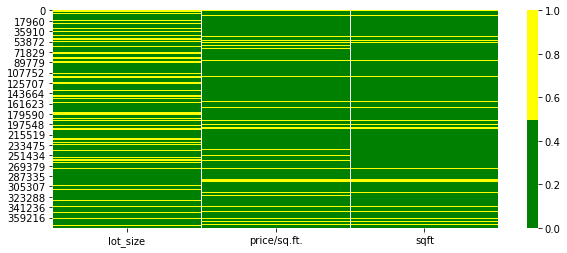

In [83]:
# Some values are still missing

cols_null_persent = data.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False)
display(cols_with_null)

colors = ['green', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [84]:
# To fill the missing values, group the data by 'propertyType', 'street', 'baths', 'beds', 'state', and 'city_size'
grouped_data = data.groupby(['property_type', 'street', 'baths', 'beds', 'state', 'city_size'])
# Use the 'transform' function to calculate the mean values for each group and fill the gaps
data['sqft'] = grouped_data['sqft'].transform(lambda x: x.fillna(x.mean()))
data['lot_size'] = grouped_data['lot_size'].transform(lambda x: x.fillna(x.mean()))
data['price/sq.ft.'] = grouped_data['price/sq.ft.'].transform(lambda x: x.fillna(x.mean()))

In [85]:
# Check missing values
null_data = data.isnull().sum()
display(null_data[null_data > 0])

sqft            7064
lot_size        6306
price/sq.ft.    8056
dtype: int64

In [86]:
# Fill the rest of missing values with the mean
data['sqft'] = data['sqft'].fillna(data['sqft'].mean())
data['lot_size'] = data['lot_size'].fillna(data['lot_size'].mean())
data['price/sq.ft.'] = data['price/sq.ft.'].fillna(data['price/sq.ft.'].mean())

In [87]:
data.head()

,status,property_type,street,baths,fireplace,sqft,beds,state,stories,private_pool,...,remodeled_year,heating,cooling,parking,lot_size,price/sq.ft.,city_size,school_count,schools_rating_ave,schools_distance_ave
0,contingent,house,lane,3,1,2900.000000,4,NC,no data,0,...,no data,air,no data,no data,19294.665455,144.000000,medium,8,5.20,5.54
1,active,house,avenue,3,0,1947.000000,3,WA,1,0,...,no data,no data,no data,no data,5828.000000,159.000000,medium,3,4.00,1.33
2,active,house,street,2,1,3000.000000,3,CA,1,1,...,before 2000,air,central,garage,8626.000000,965.000000,large,3,6.00,1.96
3,active,house,street,8,1,6457.000000,5,TX,1,0,...,2000s,air,central,garage,8220.000000,371.000000,large,4,9.33,0.75
4,active,land,street,2,0,86340.105263,no data,FL,no data,0,...,no data,no data,no data,no data,10019.000000,384.702703,medium,3,4.50,4.08


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374554 entries, 0 to 377184
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                374554 non-null  object 
 1   property_type         374554 non-null  object 
 2   street                374554 non-null  object 
 3   baths                 374554 non-null  int16  
 4   fireplace             374554 non-null  int8   
 5   sqft                  374554 non-null  float64
 6   beds                  374554 non-null  object 
 7   state                 374554 non-null  object 
 8   stories               374554 non-null  object 
 9   private_pool          374554 non-null  int32  
 10  target                374554 non-null  int64  
 11  year_built            374554 non-null  object 
 12  remodeled_year        374554 non-null  object 
 13  heating               374554 non-null  object 
 14  cooling               374554 non-null  object 
 15  

## 4) Baseline
Build a simple model, without selection of parameters.

### Prepare the data

In [89]:
# Encode categorical features
dummies_data = pd.get_dummies(data)
dummies_data.head()

,baths,fireplace,sqft,private_pool,target,lot_size,price/sq.ft.,school_count,schools_rating_ave,schools_distance_ave,...,cooling_zoned,parking_carport,parking_garage,parking_large garage,parking_no,parking_no data,parking_parking,city_size_large,city_size_medium,city_size_small
0,3,1,2900.000000,0,418000,19294.665455,144.000000,8,5.20,5.54,...,0,0,0,0,0,1,0,0,1,0
1,3,0,1947.000000,0,310000,5828.000000,159.000000,3,4.00,1.33,...,0,0,0,0,0,1,0,0,1,0
2,2,1,3000.000000,1,2895000,8626.000000,965.000000,3,6.00,1.96,...,0,0,1,0,0,0,0,1,0,0
3,8,1,6457.000000,0,2395000,8220.000000,371.000000,4,9.33,0.75,...,0,0,1,0,0,0,0,1,0,0
4,2,0,86340.105263,0,5000,10019.000000,384.702703,3,4.50,4.08,...,0,0,0,0,0,1,0,0,1,0


Split the data set into a X and y, train and test

In [90]:
X = dummies_data.drop('target', axis=1)
y = dummies_data['target']

In [91]:
# Use train_test_split to create the train and test data sets devided as 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
# Display the sizes of the sets
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (299643, 123)
Test shape: (74911, 123)


**Evaluation metrics**

Create a function to calculate the metrics:

1. MAE - Mean Absolute Error (what's the mean difference between the real and predicted price)
2. MAPE - Mean Absolute Percent Error (what's the mean difference between the real and predicted price in %)
3. $R^2$ - coefficient of determination (the closer to 1 the better. A score above 0.5 is good) 

In [92]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))

**Mean values**

What if we just give the mean price of the properties as the answer?

In [93]:
# Calculate the mean of y_train and y_test
y_train_naive = np.mean(y_train)
y_test_naive = np.mean(y_test)

y_train_pred_naive = np.full(len(y_train), y_train_naive)
y_test_pred_naive = np.full(len(y_test), y_test_naive)

print_metrics(y_train, y_train_pred_naive, y_test, y_test_pred_naive)

Train MAE: 585985.50
Train MAPE: 619.33%
Train R^2: 0.00


Test MAE: 558296.64
Test MAPE: 577.46%
Test R^2: 0.00


**Linear Regression**

Also, use a simple Linear Regression to calculate the answers

In [94]:
# Initialize Linear Regression object
lr = LinearRegression()
# Train model - find parameters
lr.fit(X_train, y_train)
# Make predictions for each dataset
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 549510.82
Train MAPE: 374.25%
Train R^2: 0.18


Test MAE: 535541.12
Test MAPE: 358.15%
Test R^2: 0.22


**The results are very bad. We should improve the data**

## 5) Explonatory Data Analysis - Part 2

The quality of the model should increase if:
* Remove outliers in the data
* Convert target feature from lognormal to normal distribution using logarithm

In [95]:
data.describe()

,baths,fireplace,sqft,private_pool,target,lot_size,price/sq.ft.,school_count,schools_rating_ave,schools_distance_ave
count,374554.000000,374554.000000,3.745540e+05,374554.000000,3.745540e+05,3.745540e+05,3.745540e+05,374554.000000,374554.000000,374554.000000
mean,2.466915,0.263217,9.950206e+03,0.118194,6.449333e+05,1.294691e+05,1.374146e+03,4.313245,5.214467,2.829497
std,1.114381,0.440380,1.500919e+06,0.322838,1.841700e+06,7.934836e+06,4.179561e+04,4.614031,2.068125,5.874368
min,0.000000,0.000000,1.000000e+02,0.000000,1.000000e+03,1.000000e+02,0.000000e+00,0.000000,1.000000,0.000000
25%,2.000000,0.000000,1.360000e+03,0.000000,1.870000e+05,5.698000e+03,1.270000e+02,3.000000,3.500000,1.030000
50%,2.000000,0.000000,1.970000e+03,0.000000,3.200000e+05,9.888000e+03,1.890000e+02,3.000000,5.026959,1.760000
75%,3.000000,1.000000,2.925875e+03,0.000000,5.828892e+05,2.189886e+04,3.400000e+02,5.000000,6.500000,3.250000
max,9.000000,1.000000,7.959794e+08,1.000000,1.950000e+08,2.147484e+09,5.950000e+06,65.000000,10.000000,1590.830000


In [96]:
# Create a copy of the data to make it easier to work with changes in the table
temp_data = data.copy()

In [97]:
# Create a list of numerical features
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['baths',
 'fireplace',
 'sqft',
 'private_pool',
 'target',
 'lot_size',
 'price/sq.ft.',
 'school_count',
 'schools_rating_ave',
 'schools_distance_ave']

In [98]:
# Create a list of categorical features
cat_features = list(types[(types == 'object')].index)
cat_features

['status',
 'property_type',
 'street',
 'beds',
 'state',
 'stories',
 'year_built',
 'remodeled_year',
 'heating',
 'cooling',
 'parking',
 'city_size']

Close look at the categorical features

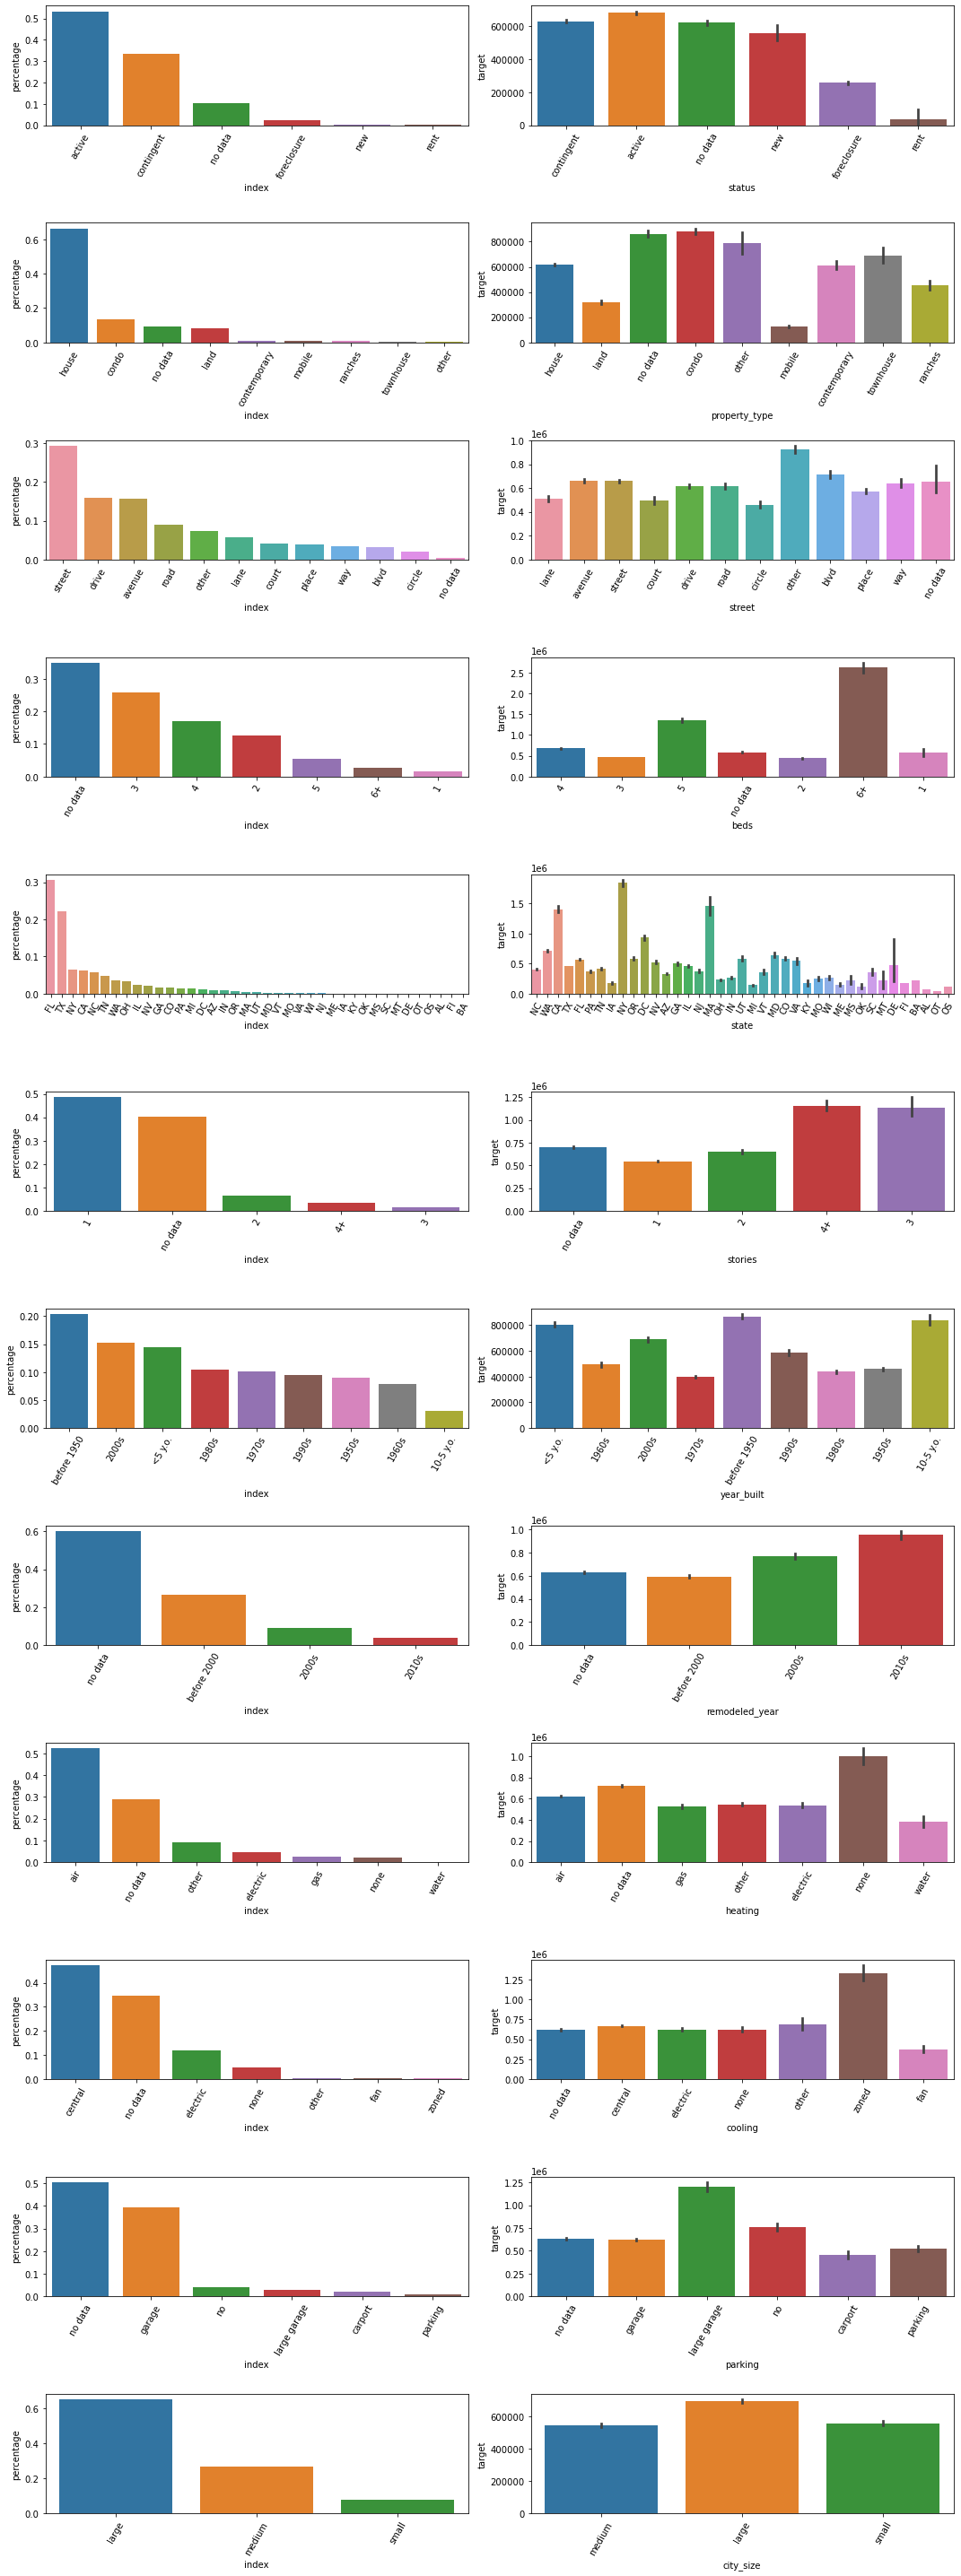

In [99]:
# Create subplots with a total of n rows and 2 columns
n = len(cat_features)
fig, axes = plt.subplots(n, 2, figsize=(15, 40))
# Iterate through each categorical feature
for i, feature in enumerate(cat_features):
    # Create a bar plot showing the counts of each category in the feature
    count_data = (data[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    # Create a bar plot showing the mean target value for each category in the feature
    mean_barplot = sns.barplot(data=data, x=feature, y='target', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout()

Examine logarithmic distributions for outliers using the z-deviation method (three sigma)

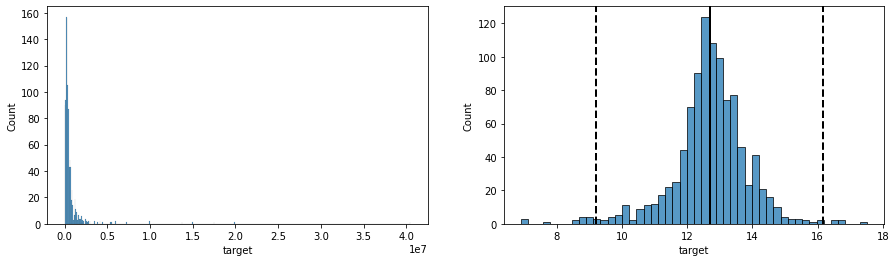

In [100]:
# Illustrate only using a sample of 1,000 randomly selected values
sample_size = 1000
sample = temp_data.sample(sample_size)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# Create a histogram
sns.histplot(data=sample, x='target', ax=axes[0])
# Logarithm
log_target = np.log(sample['target'])
# Create a histogram in a logarithm scale
sns.histplot(data=log_target, ax=axes[1])

# Adding vertical lines for the mean and 3 standard deviations to the left and right of the mean
axes[1].axvline(log_target.mean(), color='k', lw=2)
axes[1].axvline(log_target.mean()+ 3 *log_target.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_target.mean()- 3 *log_target.std(),
                color='k', ls='--', lw=2);

In [101]:
# Calculate the average value
average = temp_data['schools_distance_ave'].mean()

# Replace all 0 values with the average value
temp_data['schools_distance_ave'] = temp_data['schools_distance_ave'].replace(0, average)


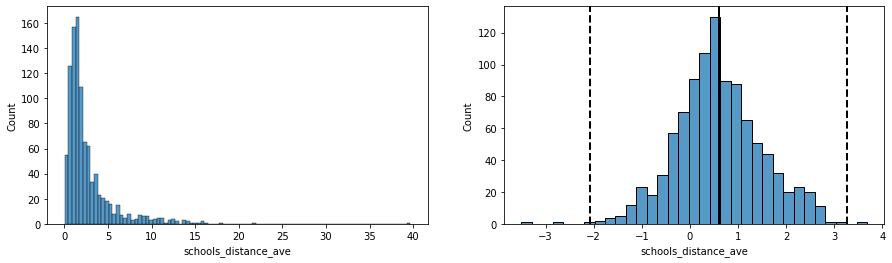

In [102]:
sample_size = 1000
sample = temp_data.sample(sample_size)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=sample, x='schools_distance_ave', ax=axes[0])

log_sqft = np.log(sample['schools_distance_ave'])
sns.histplot(data=log_sqft, ax=axes[1])

axes[1].axvline(log_sqft.mean(), color='k', lw=2)
axes[1].axvline(log_sqft.mean()+ 3 *log_sqft.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_sqft.mean()- 3 *log_sqft.std(),
                color='k', ls='--', lw=2);

In [103]:
# Calculate the average value
average = temp_data['sqft'].mean()

# Replace all 0 values with the average value
temp_data['sqft'] = temp_data['sqft'].replace(0, average)

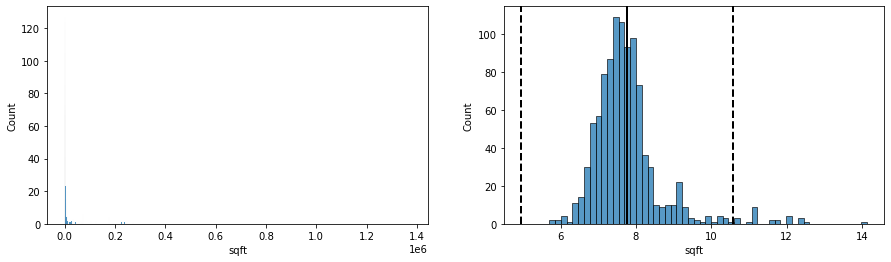

In [104]:
sample_size = 1000
sample = temp_data.sample(sample_size)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=sample, x='sqft', ax=axes[0])

log_sqft = np.log(sample['sqft'])
sns.histplot(data=log_sqft, ax=axes[1])

axes[1].axvline(log_sqft.mean(), color='k', lw=2)
axes[1].axvline(log_sqft.mean()+ 3 *log_sqft.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_sqft.mean()- 3 *log_sqft.std(),
                color='k', ls='--', lw=2);

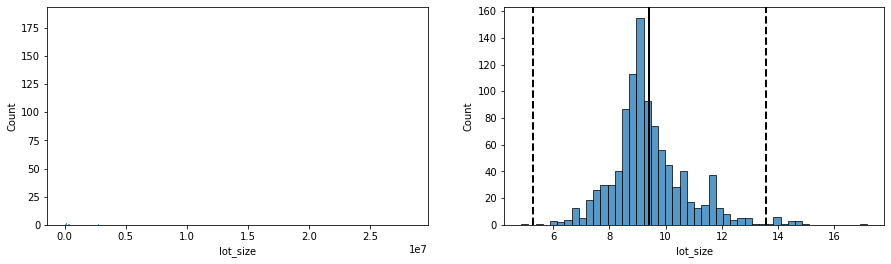

In [105]:
sample_size = 1000
sample = temp_data.sample(sample_size)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=sample, x='lot_size', ax=axes[0])

log_lot_size = np.log(sample['lot_size'])
sns.histplot(data=log_lot_size, ax=axes[1])

axes[1].axvline(log_lot_size.mean(), color='k', lw=2)
axes[1].axvline(log_lot_size.mean()+ 3 *log_lot_size.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_lot_size.mean()- 3 *log_lot_size.std(),
                color='k', ls='--', lw=2);

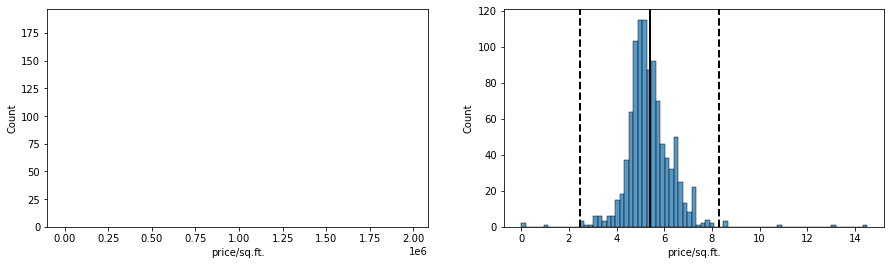

In [106]:
# Calculate the average value
average = temp_data['price/sq.ft.'].mean()

# Replace all 0 values with the average value
temp_data['price/sq.ft.'] = temp_data['price/sq.ft.'].replace(0, average)

sample_size = 1000
sample = temp_data.sample(sample_size)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=sample, x='price/sq.ft.', ax=axes[0])

log_price = np.log(sample['price/sq.ft.'])
sns.histplot(data=log_price, ax=axes[1])

axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+ 3 *log_price.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean()- 3 *log_price.std(),
                color='k', ls='--', lw=2);

Remove outliers using the z-deviation method on logarithmic features.

In [107]:
# Create a function filtering outliers using the z-deviation method
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
# Remove outliers
outliers, temp_cleaned = outliers_z_score(temp_data, 'target', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'schools_distance_ave', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'sqft', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'lot_size', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'price/sq.ft.', log_scale=True)
print('Shape before cleaning outliers: {}'.format(temp_data.shape))
print('Shape after cleaning outliers: {}'.format(temp_cleaned.shape))

Shape before cleaning outliers: (374554, 22)
Shape after cleaning outliers: (350731, 22)


In [108]:
temp_cleaned.describe(include='all')

,status,property_type,street,baths,fireplace,sqft,beds,state,stories,private_pool,...,remodeled_year,heating,cooling,parking,lot_size,price/sq.ft.,city_size,school_count,schools_rating_ave,schools_distance_ave
count,350731,350731,350731,350731.000000,350731.000000,350731.000000,350731,350731,350731,350731.000000,...,350731,350731,350731,350731,350731.000000,350731.000000,350731,350731.000000,350731.000000,350731.000000
unique,6,9,12,NaN,NaN,NaN,7,38,5,NaN,...,4,7,7,6,NaN,NaN,3,NaN,NaN,NaN
top,active,house,street,NaN,NaN,NaN,no data,FL,1,NaN,...,no data,air,central,no data,NaN,NaN,large,NaN,NaN,NaN
freq,185219,242542,103225,NaN,NaN,NaN,114401,106631,177140,NaN,...,203587,191059,173160,169406,NaN,NaN,229328,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.482284,0.274755,2542.489820,NaN,NaN,NaN,0.121270,...,NaN,NaN,NaN,NaN,28561.012686,291.675043,NaN,4.237666,5.231074,2.716613
std,NaN,NaN,NaN,1.101144,0.446391,2442.511655,NaN,NaN,NaN,0.326441,...,NaN,NaN,NaN,NaN,65114.866520,296.033597,NaN,4.497241,2.075348,2.755387
min,NaN,NaN,NaN,0.000000,0.000000,178.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,187.000000,15.000000,NaN,0.000000,1.000000,0.020000
25%,NaN,NaN,NaN,2.000000,0.000000,1344.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,5637.000000,128.000000,NaN,3.000000,3.500000,1.050000
50%,NaN,NaN,NaN,2.000000,0.000000,1932.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,9544.000000,188.000000,NaN,3.000000,5.026959,1.760000
75%,NaN,NaN,NaN,3.000000,1.000000,2818.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,20073.850000,332.000000,NaN,5.000000,6.500000,3.120000


Build a heat map to evaluate the multicollinear dependence and the linear relationship between the factors and the target feature

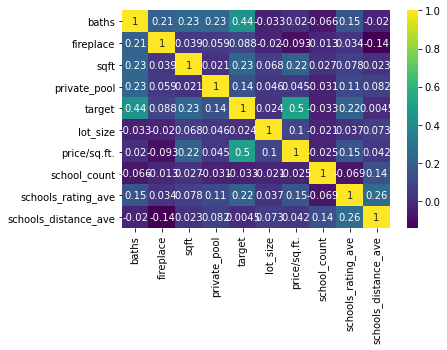

In [109]:
# Correlation heat map
fig = plt.figure()
sns.heatmap(temp_cleaned.corr(), annot=True, cmap='viridis');

Encode text categorical features

In [110]:
# Binary encode the feature 'state'

bin_encoder = ce.BinaryEncoder(cols=['state'])
type_bin = bin_encoder.fit_transform(temp_cleaned['state'])
temp_encoded = pd.concat([temp_cleaned, type_bin], axis=1)
temp_encoded = temp_encoded.drop('state', axis=1)

In [111]:
# Ordinally encode 'beds', 'stories', 'year_built', 'remodeled_year', and 'city_size'

# Initialize the encoder
encoder = OrdinalEncoder()

# Encode the columns and store the transformed data in a new DataFrame
data_encoded = temp_encoded.copy()
columns_to_encode = ['beds', 'stories', 'year_built', 'remodeled_year', 'city_size']
data_encoded[columns_to_encode] = encoder.fit_transform(temp_encoded[columns_to_encode])

# Drop the original columns
data_encoded = data_encoded.drop(columns_to_encode, axis=1)


In [112]:
# Encode categorical features
data_new = pd.get_dummies(data_encoded)
data_new.head()

,baths,fireplace,sqft,private_pool,target,lot_size,price/sq.ft.,school_count,schools_rating_ave,schools_distance_ave,...,cooling_no data,cooling_none,cooling_other,cooling_zoned,parking_carport,parking_garage,parking_large garage,parking_no,parking_no data,parking_parking
0,3,1,2900.0,0,418000,19294.665455,144.0,8,5.200000,5.540000,...,1,0,0,0,0,0,0,0,1,0
1,3,0,1947.0,0,310000,5828.000000,159.0,3,4.000000,1.330000,...,1,0,0,0,0,0,0,0,1,0
2,2,1,3000.0,1,2895000,8626.000000,965.0,3,6.000000,1.960000,...,0,0,0,0,0,1,0,0,0,0
3,8,1,6457.0,0,2395000,8220.000000,371.0,4,9.330000,0.750000,...,0,0,0,0,0,1,0,0,0,0
5,2,0,897.0,0,209000,680.000000,233.0,0,5.026959,2.829497,...,0,0,0,0,0,0,0,0,1,0


In [113]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350731 entries, 0 to 377184
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   baths                       350731 non-null  int16  
 1   fireplace                   350731 non-null  int8   
 2   sqft                        350731 non-null  float64
 3   private_pool                350731 non-null  int32  
 4   target                      350731 non-null  int64  
 5   lot_size                    350731 non-null  float64
 6   price/sq.ft.                350731 non-null  float64
 7   school_count                350731 non-null  int32  
 8   schools_rating_ave          350731 non-null  float64
 9   schools_distance_ave        350731 non-null  float64
 10  state_0                     350731 non-null  int64  
 11  state_1                     350731 non-null  int64  
 12  state_2                     350731 non-null  int64  
 13  state_3       

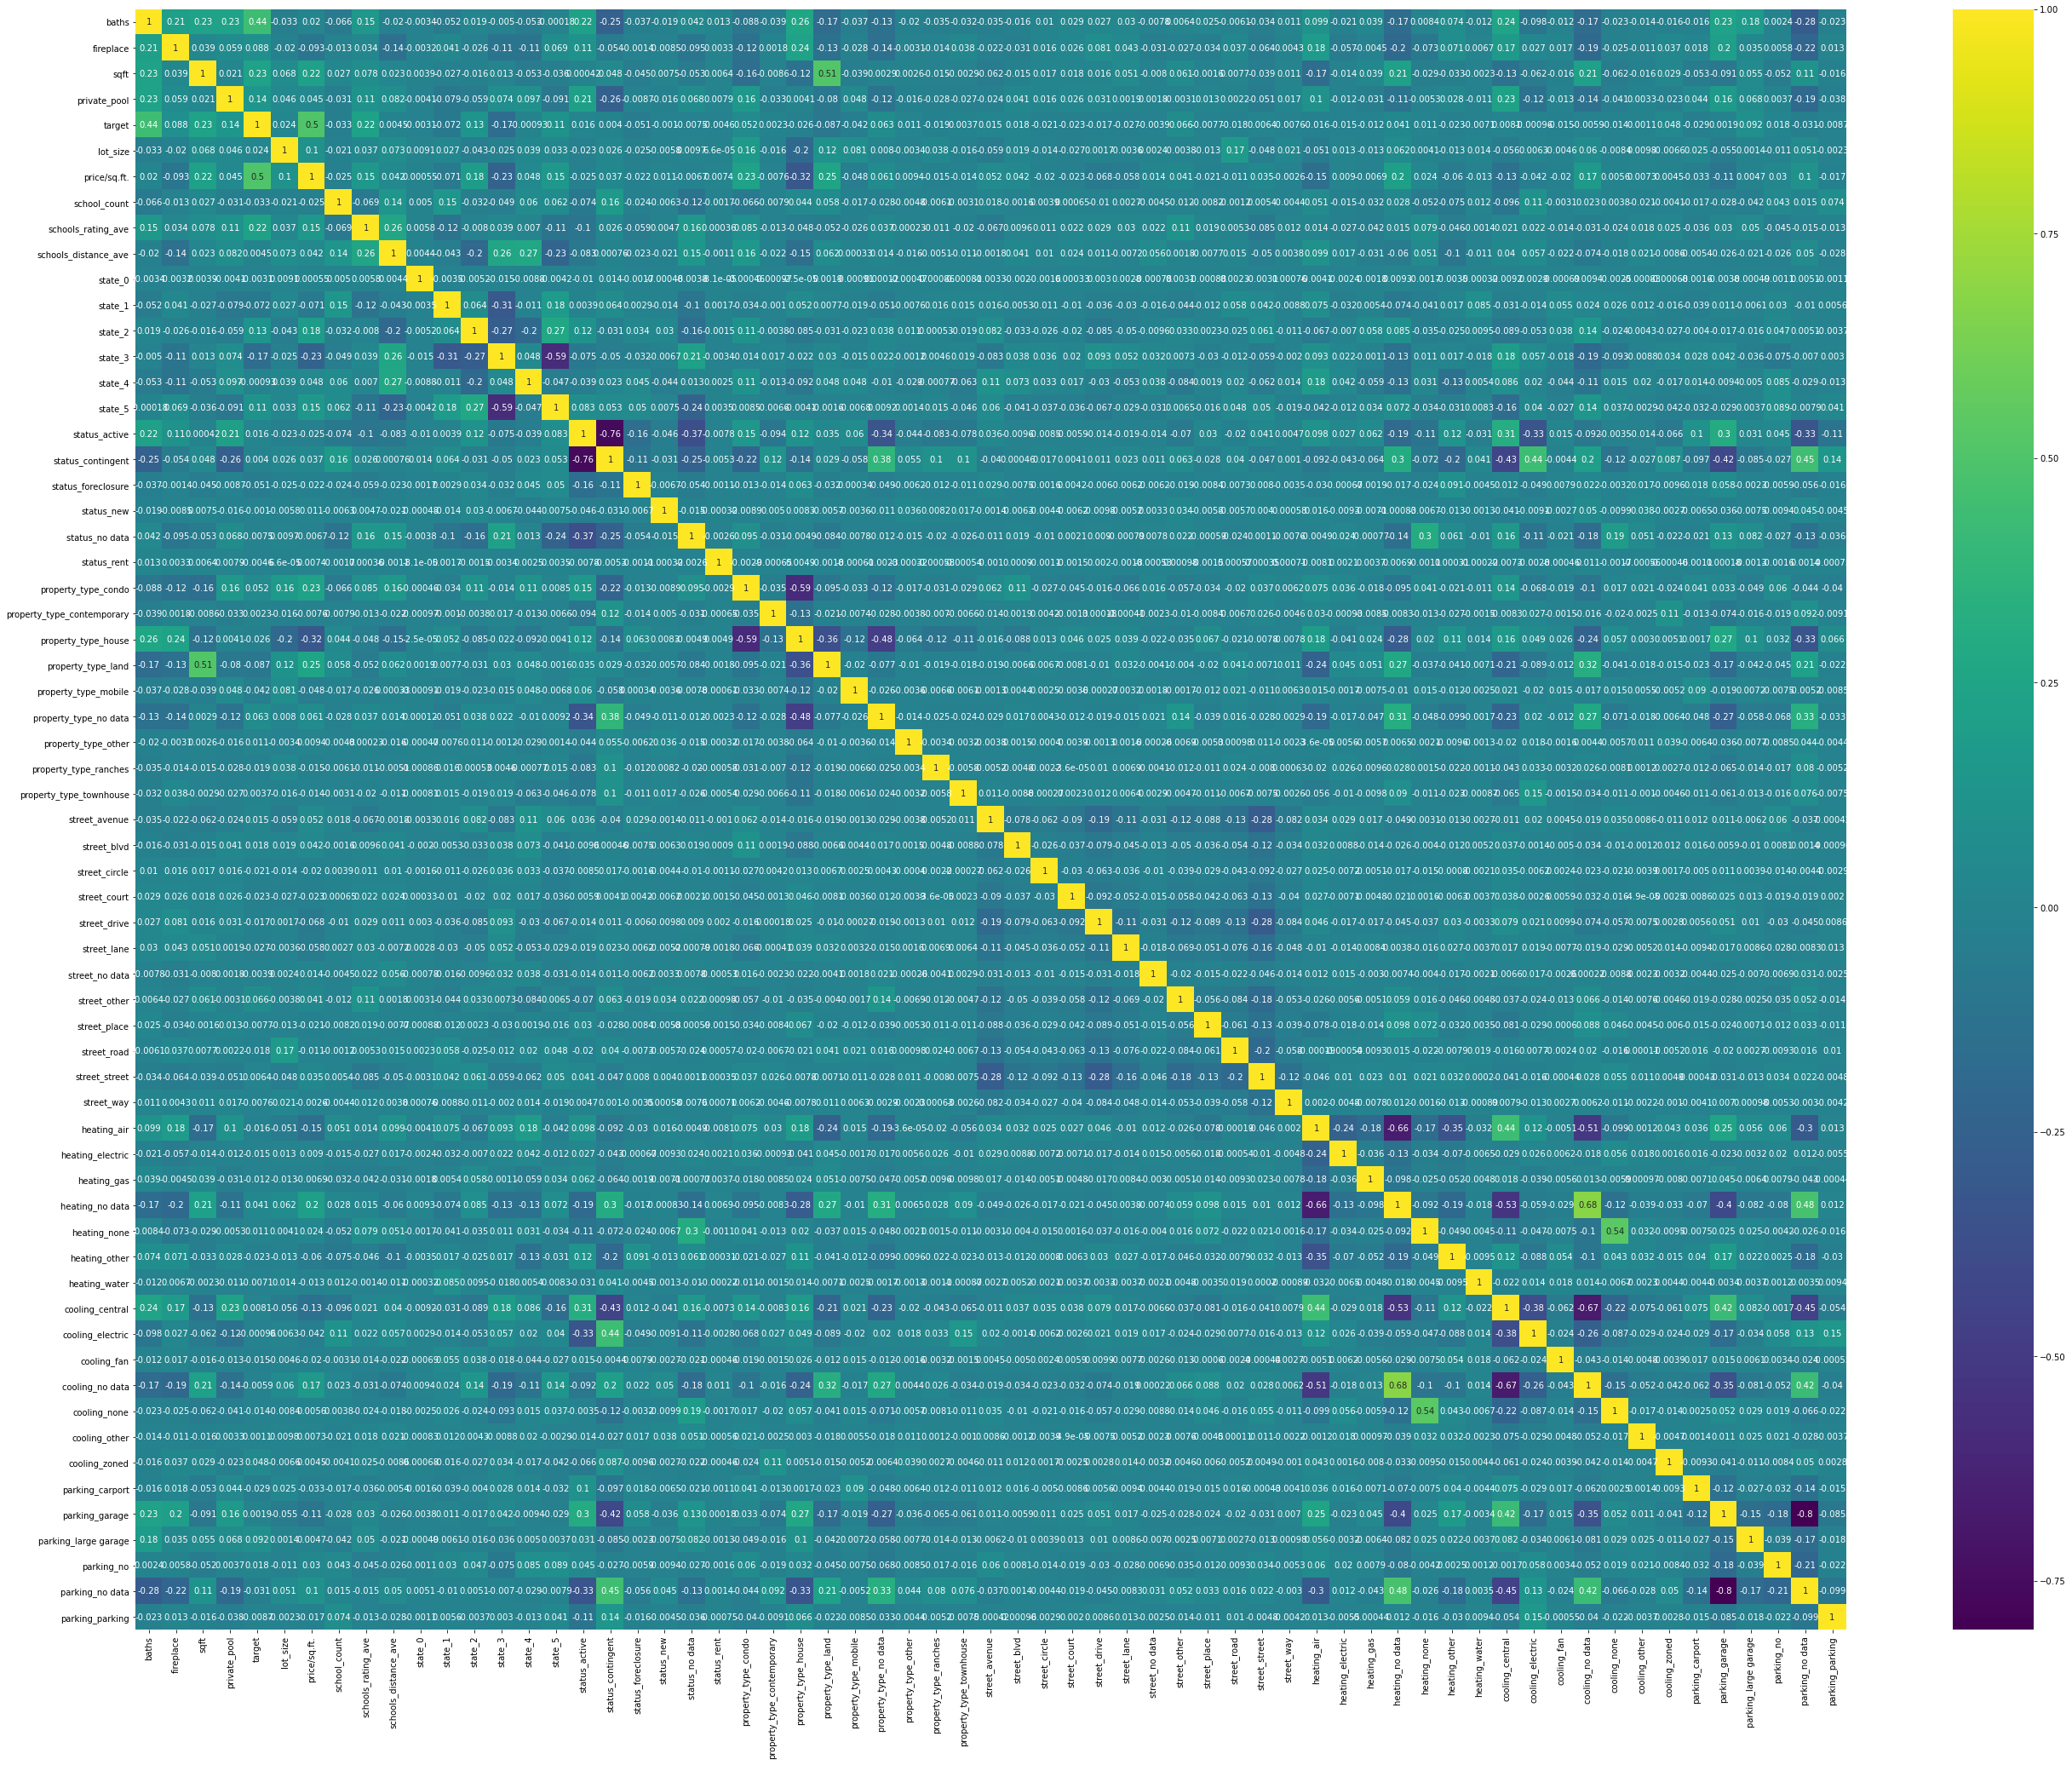

In [114]:
# Correlation heat map
fig = plt.figure(figsize=(45, 35))
sns.heatmap(data_new.corr(), annot=True, cmap='viridis');

In [115]:
# Split the dataset into train and test X and y
X = data_new.drop('target', axis=1)
y = data_new['target']

# The proportion is 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (280584, 62)
Test shape: (70147, 62)


At the moment, we have quite a lot of features: most likely, not all of them will be important. Let's leave only those that are most related to the target variable and will definitely contribute to improving the quality of the model.

Using SelectKBest, we select 25 features that are best suited for predicting the target variable on a logarithmic scale. We implement the selection based on the training sample using the score_func = f_regression parameter.

In [116]:
selector = SelectKBest(f_regression, k=25)
selector.fit(X_train, y_train)

best_features = selector.get_feature_names_out()
best_features

array(['baths', 'fireplace', 'sqft', 'private_pool', 'lot_size',
       'price/sq.ft.', 'school_count', 'schools_rating_ave', 'state_1',
       'state_2', 'state_3', 'state_5', 'status_foreclosure',
       'property_type_condo', 'property_type_house', 'property_type_land',
       'property_type_mobile', 'property_type_no data', 'street_lane',
       'street_other', 'heating_no data', 'cooling_zoned',
       'parking_carport', 'parking_large garage', 'parking_no data'],
      dtype=object)

In [117]:
X_train=X_train[best_features]
X_test=X_test[best_features]

Normalize the predictors in the train and test sets using MinMaxScaler.

In [118]:
col_names = list(X_train.columns)

mm_scaler = preprocessing.MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

## 6) Modeling

**Linear Regression**

In [119]:
# Create a logarithmic price target
y_train_log = np.log(y_train)

# Initialize the linear regression object
lr = LinearRegression()
# Train the model
lr.fit(X_train_scaled, y_train_log)

# Predict the results
# As we trained the model using the logarithm, we should thake the exponent of the result (np.exp)
y_train_pred = np.exp(lr.predict(X_train_scaled))
y_test_pred = np.exp(lr.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 257044.81
Train MAPE: 67.98%
Train R^2: 0.09


Test MAE: 255093.75
Test MAPE: 67.69%
Test R^2: 0.27


The results are significantly better than the baseline.

Let's try another model.

**Light Gradient Boosted Machine Regressor**

In [120]:
# Create a logarithmic price target
y_train_log = np.log(y_train)

# Initialize the LGBM Regressor object
lightgbm = LGBMRegressor(objective='regression', 
                        n_estimators=400,
                        max_bin=250,
                        num_leaves=10,
                        bagging_seed=10,
                        feature_fraction_seed=2,
                        learning_rate=0.01, 
                        verbose=-1,
                        random_state=42)

# Train the model
lightgbm.fit(X_train_scaled, y_train_log)

# Predict the results
y_train_pred = np.exp(lightgbm.predict(X_train_scaled))
y_test_pred = np.exp(lightgbm.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 146865.00
Train MAPE: 34.02%
Train R^2: 0.63


Test MAE: 147937.08
Test MAPE: 34.16%
Test R^2: 0.63


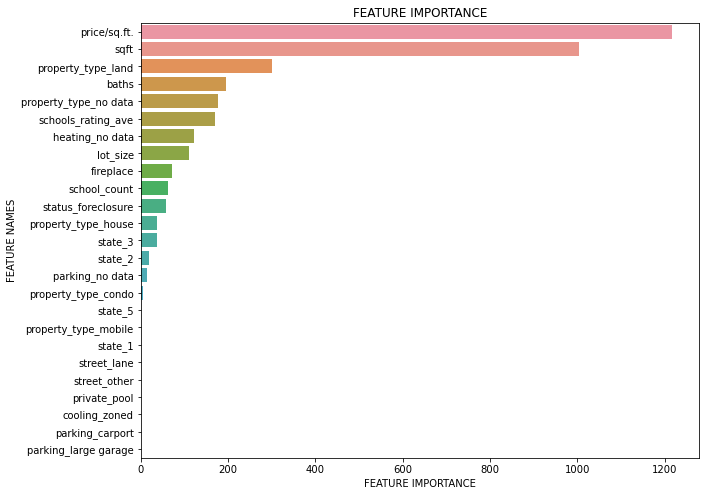

In [121]:
# Display the importance of the features
feature_importance = np.array(lightgbm.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Define size of bar plot
plt.figure(figsize=(10,8))
# Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

**Gradient Boosting**

In [122]:
# Initialize the linear regression object
gbr = GradientBoostingRegressor(n_estimators=400,
                                min_samples_leaf=10,
                                min_samples_split=9,
                                random_state=42)

# Train the model
gbr.fit(X_train_scaled, y_train_log)

# Predict the results
y_train_pred = np.exp(gbr.predict(X_train_scaled))
y_test_pred = np.exp(gbr.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 98710.24
Train MAPE: 25.11%
Train R^2: 0.80


Test MAE: 100903.86
Test MAPE: 25.15%
Test R^2: 0.78


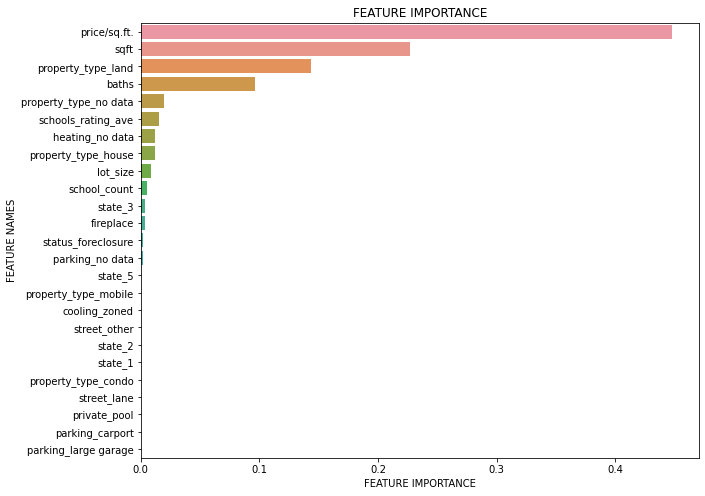

In [123]:
# Display the importance of the features
feature_importance = np.array(gbr.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');


**Extreme Gradient Boosting**

In [124]:
# Initialize the XGB Regressor object
xgboost = XGBRegressor(n_estimators=1000,
                        max_depth=7,
                        eta=0.1,
                        subsample=0.7,
                        colsample_bytree=0.8
)

# Train the model
xgboost.fit(X_train_scaled, y_train_log)

# Predict the results
y_train_pred = np.exp(xgboost.predict(X_train_scaled))
y_test_pred = np.exp(xgboost.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 61121.32
Train MAPE: 11.86%
Train R^2: 0.88


Test MAE: 75383.62
Test MAPE: 16.76%
Test R^2: 0.83


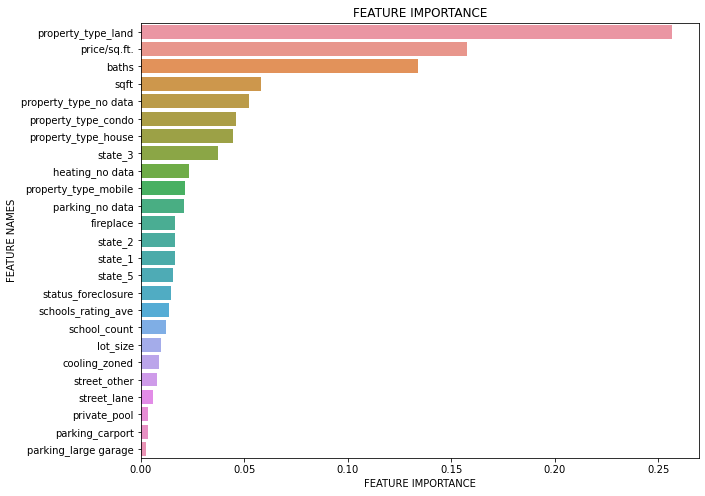

In [125]:
# Display the importance of the features
data={'feature_names':feature_names,'feature_importance':xgboost.feature_importances_}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Define size of bar plot
plt.figure(figsize=(10,8))
# Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

**Random Forest**

In [126]:
# Create a logarithmic price target
y_train_log = np.log(y_train)

# Initialize the Random Forest Regressor object
rfr = RandomForestRegressor(n_estimators=300,
                            max_depth=30,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_features=None,
                            oob_score=True,
                            random_state=42)

# Train the model
rfr.fit(X_train_scaled, y_train_log)

# Predict the results
y_train_pred = np.exp(rfr.predict(X_train_scaled))
y_test_pred = np.exp(rfr.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train MAE: 44053.31
Train MAPE: 8.18%
Train R^2: 0.89


Test MAE: 60829.28
Test MAPE: 15.09%
Test R^2: 0.84


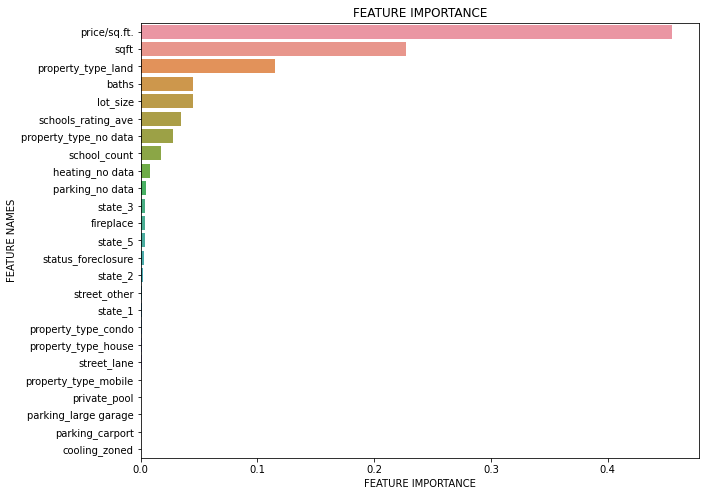

In [127]:
# Display the importance of the features
feature_importance = np.array(rfr.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Define size of bar plot
plt.figure(figsize=(10,8))
# Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

**Stacking Regressor**

In [128]:
# Create a list of tuples containing the name and object for each model
base_models = [('lr', lr), ('lightgbm', lightgbm), ('gbr', gbr), ('xgboost', xgboost), ('rfr', rfr)]

# Create the blending model
blend_model = StackingRegressor(estimators=base_models)

# Fit the blending model on the training data
blend_model.fit(X_train_scaled, y_train_log)

# Make predictions on the test data
y_train_pred = np.exp(blend_model.predict(X_train_scaled))
y_test_pred = np.exp(blend_model.predict(X_test_scaled))

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)


Train MAE: 51501.83
Train MAPE: 9.63%
Train R^2: 0.89


Test MAE: 66015.69
Test MAPE: 15.31%
Test R^2: 0.84


## 7) Results

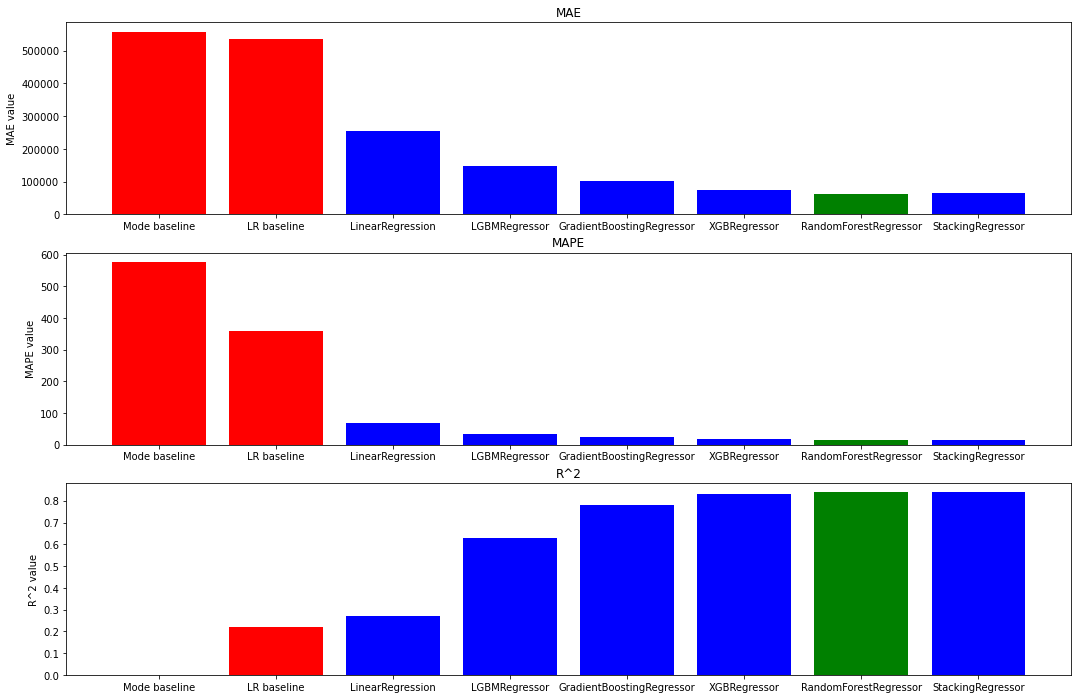

In [133]:
field_names = ['Mode baseline', 'LR baseline', 'LinearRegression', "LGBMRegressor", "GradientBoostingRegressor",  'XGBRegressor', 'RandomForestRegressor', 'StackingRegressor']

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12))

# Extract the data for each measurement
mae = [558296.64, 535541.12, 255093.75, 147937.08, 100903.86, 75383.62, 60829.28, 66015.69]
mape = [577.46, 358.15, 67.69, 34.16, 25.15, 16.76, 15.09, 15.31]
r2 = [0, 0.22, 0.27, 0.63, 0.78, 0.83, 0.84, 0.84]

# Create the bar plots
_ = ax1.bar(field_names, mae, color=['r', 'r', 'b', 'b', 'b', 'b', 'g', 'b'])
_ = ax2.bar(field_names, mape, color=['r', 'r', 'b', 'b', 'b', 'b', 'g', 'b'])
_ = ax3.bar(field_names, r2, color=['r', 'r', 'b', 'b', 'b', 'b', 'g', 'b'])

# Add title and labels to the plots
_ = ax1.set_title("MAE")
_ = ax1.set_ylabel("MAE value")
_ = ax2.set_title("MAPE")
_ = ax2.set_ylabel("MAPE value")
_ = ax3.set_title("R^2")
_ = ax3.set_ylabel("R^2 value")

# Show the plot
plt.show()


### Conclusion

1. The best results are shown by the **Random Forest Regressor** model. The Mean Absolute Error is around **$60,000**, which is quite a lot. However, it's much (almost 10 times) better than the baseline. The Mean Absolute Percent Error is around **15%**. The R^2 score (coefficient of determination) shows a relatively good **0.84** (on a scale from -1 to 1).

2. Overall, the original dataset has a lot of issues and inconsistencies. Cleaning and unwrapping of these issues were ones of the main objectives of this project, which was accomplished successfully.

3. Another objective of this project was to demonstrate different machine-learning algorithms. The hyperparameters for all models were found using **Optuna**, a hyperparameter optimization framework. We left these calculations outside this Notebook as they are quite time-consuming.